<a href="https://colab.research.google.com/github/DangTanTai/AI/blob/main/Fruit_DangTanTai_19146253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv

In [ ]:
trai_cay = ['Cam','Tao','Chuoi','Dau','DuaHau','MangCut','Nho','SauRieng','ThanhLong','Xoai']
dir_train = '/content/drive/MyDrive/Fruit' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in trai_cay:
    path = os.path.join(dir,i)
    index_label = trai_cay.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      img = img.reshape(150,150,3) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train)  
# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 10)
print(x_train.shape)
print(y_train.shape)
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(27,48),
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=(150,150,3),
                 strides=(9,16)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,
                 kernel_size=(27,48), 
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=128,
                 kernel_size=(27,48), 
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(1028, activation='relu', name='layer2'))
model.add(Dense(1028, activation='relu', name='layer3'))
model.add(Dense(10, activation='softmax', name='layer4'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 120,verbose=1,batch_size=35)

(160, 150, 150, 3)
(160, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 17, 10, 32)        124448    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 5, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 5, 64)          2654272   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 2, 128)         10616960  
                                                                 
 max_pooling2d_2 (MaxPoolin

In [ ]:
model.save('fruit.h5')

Giá trị dự đoán: 1
Táo


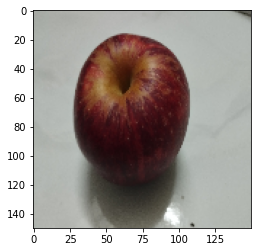

In [ ]:
filename= '/content/drive/MyDrive/Test_fruit/Táo/22.jpg'
fruit = image.load_img(filename, target_size=(150,150)) 
plt.imshow(fruit)
fruit = img_to_array(fruit)
fruit = fruit.reshape(1,150,150,3) 
fruit = fruit.astype('float32')
fruit = fruit/255
np.argmax(model.predict(fruit), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(fruit)))
if np.argmax(model.predict(fruit)) == 0:
   print("Cam")
if np.argmax(model.predict(fruit)) == 1:
   print("Táo")
if np.argmax(model.predict(fruit)) == 2:
   print("Chuối")
if np.argmax(model.predict(fruit)) == 3:
   print("Dâu")
if np.argmax(model.predict(fruit)) == 4:
   print("Dưa Hấu")
if np.argmax(model.predict(fruit)) == 5:
   print("Măng Cụt")
if np.argmax(model.predict(fruit)) == 6:
   print("Nho")
if np.argmax(model.predict(fruit)) == 7:
   print("Sầu Riêng")
if np.argmax(model.predict(fruit)) == 8:
   print("Thanh Long")
if np.argmax(model.predict(fruit)) == 9:
   print("Xoài")


Giá trị dự đoán: 7
Sầu Riêng


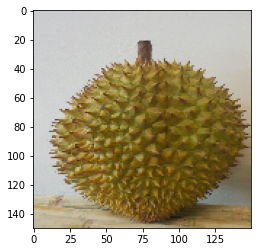

In [ ]:
filename1= '/content/drive/MyDrive/Test_fruit/Sầu_Riêng/Nuoc-mia-sau-rieng (2).jpg'
fruit = image.load_img(filename1, target_size=(150,150)) 
plt.imshow(fruit)
fruit = img_to_array(fruit)
fruit = fruit.reshape(1,150,150,3) 
fruit = fruit.astype('float32')
fruit = fruit/255
np.argmax(model.predict(fruit), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(fruit)))
if np.argmax(model.predict(fruit)) == 0:
   print("Cam")
if np.argmax(model.predict(fruit)) == 1:
   print("Táo")
if np.argmax(model.predict(fruit)) == 2:
   print("Chuối")
if np.argmax(model.predict(fruit)) == 3:
   print("Dâu")
if np.argmax(model.predict(fruit)) == 4:
   print("Dưa Hấu")
if np.argmax(model.predict(fruit)) == 5:
   print("Măng Cụt")
if np.argmax(model.predict(fruit)) == 6:
   print("Nho")
if np.argmax(model.predict(fruit)) == 7:
   print("Sầu Riêng")
if np.argmax(model.predict(fruit)) == 8:
   print("Thanh Long")
if np.argmax(model.predict(fruit)) == 9:
   print("Xoài")


Giá trị dự đoán: 2
Chuối


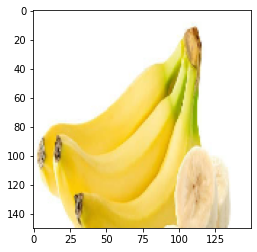

In [ ]:
filename2= '/content/drive/MyDrive/Test_fruit/Chuối/chuoi_8_e1535077816238_MRXC (2).jpg'
fruit = image.load_img(filename2, target_size=(150,150)) 
plt.imshow(fruit)
fruit = img_to_array(fruit)
fruit = fruit.reshape(1,150,150,3) 
fruit = fruit.astype('float32')
fruit = fruit/255
np.argmax(model.predict(fruit), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(fruit)))
if np.argmax(model.predict(fruit)) == 0:
   print("Cam")
if np.argmax(model.predict(fruit)) == 1:
   print("Táo")
if np.argmax(model.predict(fruit)) == 2:
   print("Chuối")
if np.argmax(model.predict(fruit)) == 3:
   print("Dâu")
if np.argmax(model.predict(fruit)) == 4:
   print("Dưa Hấu")
if np.argmax(model.predict(fruit)) == 5:
   print("Măng Cụt")
if np.argmax(model.predict(fruit)) == 6:
   print("Nho")
if np.argmax(model.predict(fruit)) == 7:
   print("Sầu Riêng")
if np.argmax(model.predict(fruit)) == 8:
   print("Thanh Long")
if np.argmax(model.predict(fruit)) == 9:
   print("Xoài")

Giá trị dự đoán: 8
Thanh Long


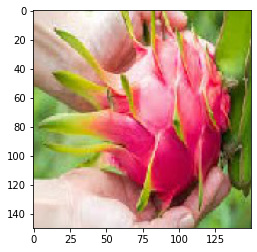

In [ ]:
filename3= '/content/drive/MyDrive/Test_fruit/Thanh_Long/images (2).jpg'
fruit = image.load_img(filename3, target_size=(150,150)) 
plt.imshow(fruit)
fruit = img_to_array(fruit)
fruit = fruit.reshape(1,150,150,3) 
fruit = fruit.astype('float32')
fruit = fruit/255
np.argmax(model.predict(fruit), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(fruit)))
if np.argmax(model.predict(fruit)) == 0:
   print("Cam")
if np.argmax(model.predict(fruit)) == 1:
   print("Táo")
if np.argmax(model.predict(fruit)) == 2:
   print("Chuối")
if np.argmax(model.predict(fruit)) == 3:
   print("Dâu")
if np.argmax(model.predict(fruit)) == 4:
   print("Dưa Hấu")
if np.argmax(model.predict(fruit)) == 5:
   print("Măng Cụt")
if np.argmax(model.predict(fruit)) == 6:
   print("Nho")
if np.argmax(model.predict(fruit)) == 7:
   print("Sầu Riêng")
if np.argmax(model.predict(fruit)) == 8:
   print("Thanh Long")
if np.argmax(model.predict(fruit)) == 9:
   print("Xoài")

Giá trị dự đoán: 6
Nho


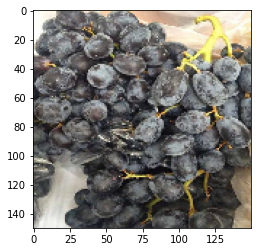

In [ ]:
filename3= '/content/drive/MyDrive/Test_fruit/Nho/gia-nho-den-khong-hat-uc-min.jpg'
fruit = image.load_img(filename3, target_size=(150,150)) 
plt.imshow(fruit)
fruit = img_to_array(fruit)
fruit = fruit.reshape(1,150,150,3) 
fruit = fruit.astype('float32')
fruit = fruit/255
np.argmax(model.predict(fruit), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(fruit)))
if np.argmax(model.predict(fruit)) == 0:
   print("Cam")
if np.argmax(model.predict(fruit)) == 1:
   print("Táo")
if np.argmax(model.predict(fruit)) == 2:
   print("Chuối")
if np.argmax(model.predict(fruit)) == 3:
   print("Dâu")
if np.argmax(model.predict(fruit)) == 4:
   print("Dưa Hấu")
if np.argmax(model.predict(fruit)) == 5:
   print("Măng Cụt")
if np.argmax(model.predict(fruit)) == 6:
   print("Nho")
if np.argmax(model.predict(fruit)) == 7:
   print("Sầu Riêng")
if np.argmax(model.predict(fruit)) == 8:
   print("Thanh Long")
if np.argmax(model.predict(fruit)) == 9:
   print("Xoài")